In [1]:
# Based on the structure described in the tutorial at
# https://www.kaggle.com/paultimothymooney/interpret-sign-language-with-deep-learning

In [2]:
import tensorflow as tf

In [90]:
import os
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
import VGG16
from glob import glob
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

ModuleNotFoundError: No module named 'VGG16'

In [66]:
imageSize=50
train_dir = "./Dataset/train/"
test_dir =  "./Dataset/test/"
import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    
    for folderName in os.listdir(train_dir):
        if folderName == '.ipynb_checkpoints':
            continue
        else:
            
            for filename in os.listdir(f'{train_dir}/{folderName}'):
                if filename.startswith('A'):
                    label = 0
                elif filename.startswith('B'):
                    label = 1
                elif filename.startswith('C'):
                    label = 2
                elif filename.startswith('D'):
                    label = 3
                elif filename.startswith('E'):
                    label = 4
                elif filename.startswith('F'):
                    label = 5
                elif filename.startswith('G'):
                    label = 6
                elif filename.startswith('H'):
                    label = 7
                elif filename.startswith('I'):
                    label = 8
                elif filename.startswith('J'):
                    label = 9
                elif filename.startswith('K'):
                    label = 10
                elif filename.startswith('L'):
                    label = 11
                elif filename.startswith('M'):
                    label = 12
                elif filename.startswith('N'):
                    label = 13
                elif filename.startswith('O'):
                    label = 14
                elif filename.startswith('P'):
                    label = 15
                elif filename.startswith('Q'):
                    label = 16
                elif filename.startswith('R'):
                    label = 17
                elif filename.startswith('S'):
                    label = 18
                elif filename.startswith('T'):
                    label = 19
                elif filename.startswith('U'):
                    label = 20
                elif filename.startswith('V'):
                    label = 21
                elif filename.startswith('W'):
                    label = 22
                elif filename.startswith('X'):
                    label = 23
                elif filename.startswith('Y'):
                    label = 24
                elif filename.startswith('Z'):
                    label = 25
                    
                img_file = cv2.imread(folder + folderName + '/' +filename)
                if img_file is not None:
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
        X = np.asarray(X)
        y = np.asarray(y)
        return X,y
    
X_train, y_train = get_data(train_dir) 
#X_test, y_test= get_data(test_dir) # Too few images

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_trainHot = tf.keras.utils.to_categorical(y_train, num_classes = 30)
y_testHot = tf.keras.utils.to_categorical(y_test, num_classes = 30)

X_train

array([[[[ 86,  91,  89],
         [ 89,  94,  92],
         [ 89,  94,  92],
         ...,
         [ 23,  32,  45],
         [ 20,  29,  42],
         [ 17,  26,  39]],

        [[ 87,  93,  88],
         [ 90,  96,  91],
         [ 89,  95,  90],
         ...,
         [ 23,  32,  45],
         [ 17,  26,  39],
         [ 12,  21,  34]],

        [[ 89,  95,  90],
         [ 91,  97,  92],
         [ 90,  96,  91],
         ...,
         [ 25,  34,  47],
         [ 18,  27,  40],
         [ 11,  20,  33]],

        ...,

        [[136, 124, 112],
         [132, 121, 107],
         [137, 126, 112],
         ...,
         [104,  88,  81],
         [108,  90,  83],
         [109,  91,  84]],

        [[135, 123, 111],
         [135, 124, 110],
         [137, 126, 112],
         ...,
         [166, 146, 129],
         [166, 146, 129],
         [168, 145, 129]],

        [[132, 120, 108],
         [137, 126, 112],
         [135, 124, 110],
         ...,
         [183, 161, 136],
        

In [67]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:30000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:30000]
y_testHot = y_testHot[:30000]

In [68]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:30000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:30000]
y_testHot = y_testHot[:30000]

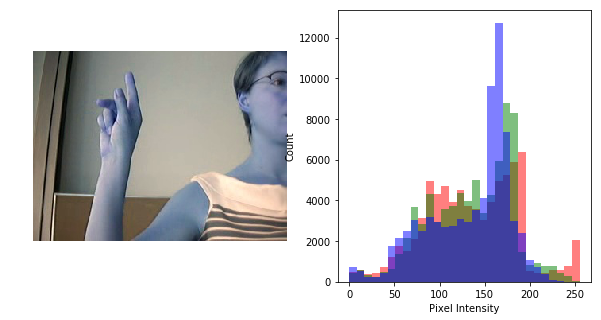

In [69]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

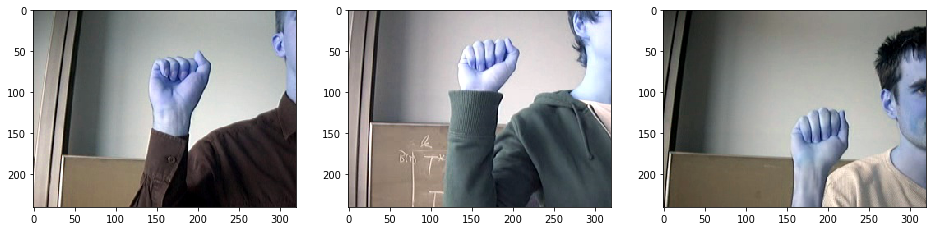

In [81]:
# Check model for letter 'A'
multipleImages = glob('./Dataset/train/*/A*')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2]))
    
plotThreeImages(multipleImages)

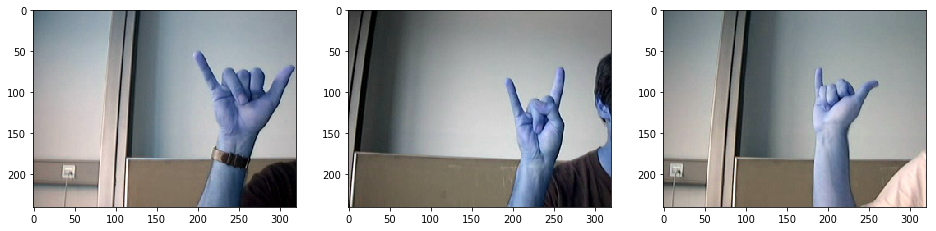

In [82]:
# Check model for letter 'Y'
multipleImages = glob('./Dataset/train/*/Y*')
def plotThreeImages(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(16,16))
    plt.subplot(131)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])) 
plotThreeImages(multipleImages)

A


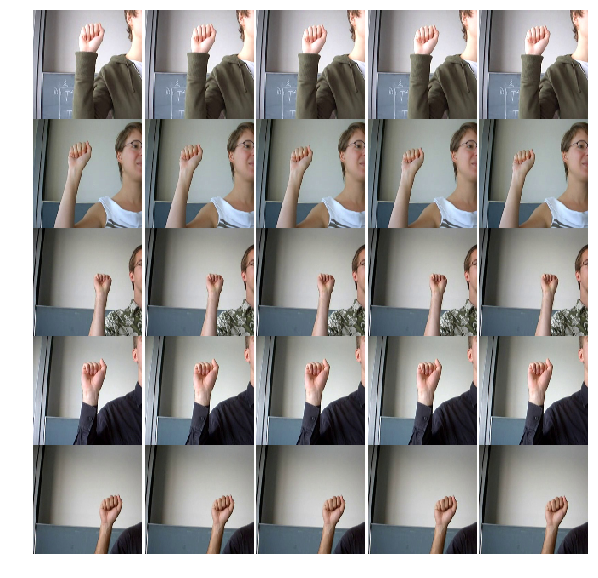

In [84]:
print("A")
multipleImages = glob('./Dataset/train/*/A*')
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


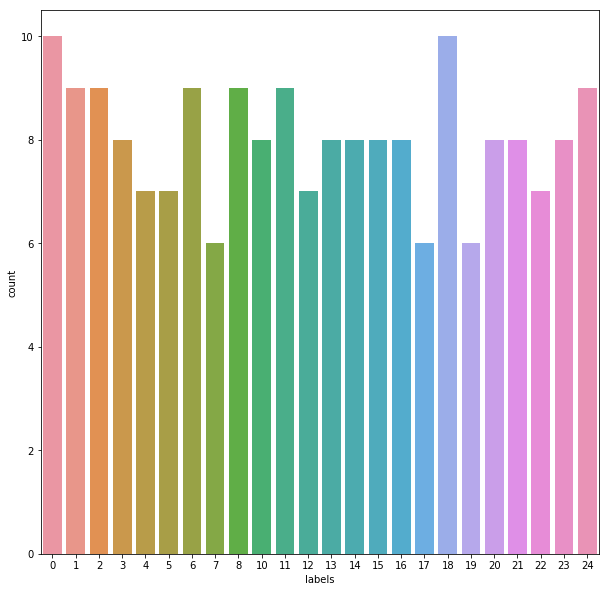

In [85]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [88]:
# Helper Functions  Learning Curves and Confusion Matrix

from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [108]:
# Characteristics needed for model classification
map_characters1 = map_characters
class_weight1 = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
weight_path1 = './keras_models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
weight_path2 = './keras_models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model_1 = tf.keras.applications.VGG16(weights = weight_path1, include_top=False, input_shape=(imageSize, imageSize, 3))

#pretrained_model_2 = InceptionV3(weights = weight_path2, include_top=False, input_shape=(imageSize, imageSize, 3))
optimizer1 = tf.keras.optimizers.Adam()
optimizer2 = tf.keras.optimizers.RMSprop(lr=0.0001)
def pretrainedNetwork(xtrain,ytrain,xtest,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,optimizer,labels):
    base_model = pretrained_model_1 # Topless
    
    # Add top layer
    x = base_model.output
    x = tf.keras.layers.Flatten()(x)
    predictions = tf.keras.layers.Dense(numclasses, activation='softmax')(x)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    
    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    callbacks_list = [tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    
    # Fit model
    history = model.fit(xtrain,ytrain, epochs=numepochs, class_weight=classweight, validation_data=(xtest,ytest), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    
    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = model.predict(xtest)
    print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_learning_curve(history)
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
    plt.show()
    return model
pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot,pretrained_model_1,weight_path1,class_weight1,30,10,optimizer1,map_characters1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 50, 50, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

ValueError: Error when checking input: expected input_15 to have shape (50, 50, 3) but got array with shape (240, 320, 3)

In [91]:
# Convert model for tflite to use in ML Kit on Android Studio
# Followed steps by https://proandroiddev.com/exporting-tensorflow-models-to-ml-kit-bce13b914f31
inp = tf.placeholder(name="inp", dtype=tf.float32, shape=(1, 1))
w = tf.Variable(tf.zeros([1, 1], tf.float32), dtype=tf.float32, name="w")

y = tf.matmul(w, inp)

out = tf.identity(y, name="out")

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    # After Init var, change the value to 2
    assignment = w.assign([[2]])
    sess.run(assignment)
    
    output = sess.run(out, feed_dict={inp: [[1]]})
    print(output)
    
    frozen_graph = freeze_session(sess, output_names=[out.op.name])

    tflite_model = tf.contrib.lite.toco_convert(frozen_graph, [inp], [out])
    open("mat_mul.tflite", "wb").write(tflite_model)